In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d=pd.read_excel("C:\\Users\\mouni\\OneDrive\\Desktop\\Amazon Sale Report.xlsx")
df=pd.DataFrame(d)

In [4]:
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
print("Missing values:\n",df.isnull().sum())

Missing values:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [7]:
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 168


In [8]:
print(df.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object


In [9]:
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Category'].fillna('unknown',inplace=True)


In [10]:
df.dropna(subset=['Order ID'],inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce')


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce')

In [14]:
print("Missing values in 'Amount' column:",df['Amount'].isnull().sum())

Missing values in 'Amount' column: 0


In [15]:
print("Missing/invalid dates in 'Date' column:",df['Date'].isnull().sum())

Missing/invalid dates in 'Date' column: 0


In [16]:
print(df.dtypes)

index                          int64
Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
ship-country                  object
B2B                             bool
fulfilled-by                  object
New                          float64
PendingS                     float64
dtype: object


In [17]:
df['month'] = df['Date'].dt.to_period("M")
df['year'] = df['Date'].dt.year

In [18]:
print(df.head())

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...    ship-city   ship-state  ship-postal-code ship-country    B2B  \
0  ...

In [19]:
#sales overview

In [20]:
Monthly_sales = df.groupby('month')['Amount'].sum()

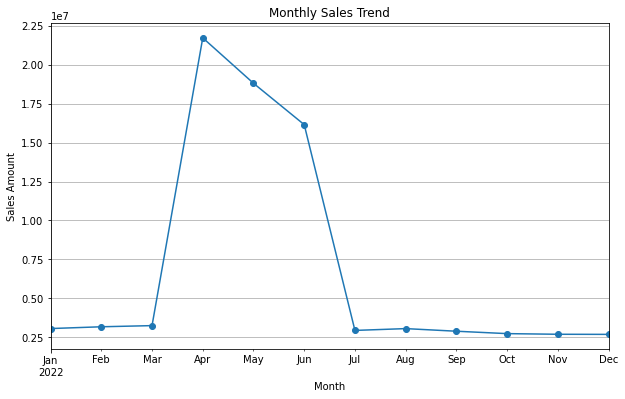

In [21]:
plt.figure(figsize=(10,6))
Monthly_sales.plot(kind='line',marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

In [22]:
#Product Analysis

In [23]:
Category_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

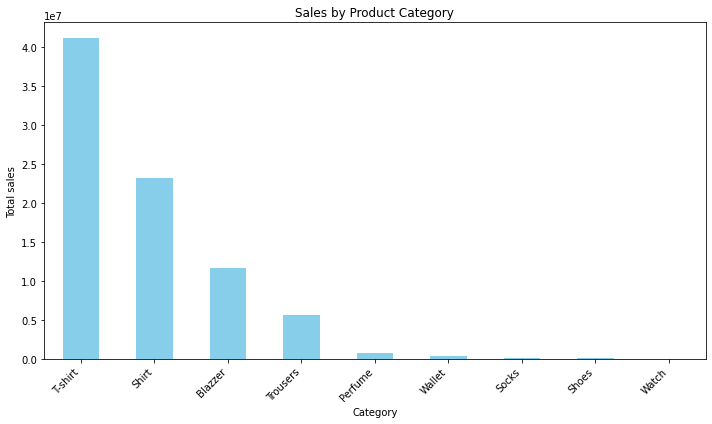

In [24]:
plt.figure(figsize=(10,6))
Category_sales.plot(kind='bar',color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [25]:
#Fulfillment Analysis

In [26]:
Fulfillment_method_counts = df['Fulfilment'].value_counts()

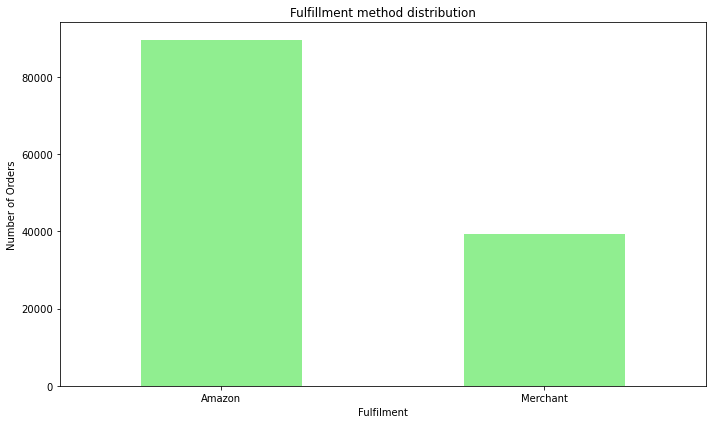

In [27]:
plt.figure(figsize=(10,6))
Fulfillment_method_counts.plot(kind='bar',color= 'lightgreen')
plt.title('Fulfillment method distribution')
plt.xlabel('Fulfilment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [28]:
#Customer segmentation

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df['recency'] = (pd.to_datetime('today') - df['Date']).dt.days

In [31]:
frequency=df.groupby('Order ID').size()

In [32]:
monetary=df.groupby('Order ID')['Amount'].sum()

In [33]:
rfm = pd.DataFrame({'recency':df.groupby('Order ID')['recency'].min(),
                   'frequency':frequency,
                   'monetary':monetary})

In [34]:
print(rfm.fillna(0))

                     recency  frequency  monetary
Order ID                                         
171-0000547-8192359      887          1     301.0
171-0000902-4490745      825          1     544.0
171-0001409-6228339      887          1     422.0
171-0003082-5110755      979          1     563.0
171-0003738-2052324     1011          1     379.0
...                      ...        ...       ...
S02-9578181-3610412      926          1     605.0
S02-9599483-2736812      908          1     605.0
S02-9649067-3246849      956          1     605.0
S02-9736323-0094708      939          1     605.0
S02-9878098-5959538      856          1     605.0

[120229 rows x 3 columns]


In [35]:
def safe_qcut(series,num_bins=4):
    try:
        return pd.qcut(series, num_bins, labels=[1,2,3,4], duplicates='drop')
    except ValueError:
        return pd.Series([1] * len(series))

In [36]:
rfm['recency_score'] = safe_qcut(rfm['recency'],4)
rfm['frequency_score'] = safe_qcut(rfm['frequency'],4)
rfm['monetary_score'] = safe_qcut(rfm['monetary'],4)

In [37]:
rfm['recency_score'].fillna(1,inplace=True)
rfm['frequency_score'].fillna(1,inplace=True)
rfm['monetary_score'].fillna(1,inplace=True)

In [38]:
rfm['recency_score']=rfm['recency_score'].astype(int)
rfm['frequency_score']=rfm['frequency_score'].astype(int)
rfm['monetary_score']=rfm['monetary_score'].astype(int)

In [39]:
rfm['RFM_Score'] = rfm['recency_score']+rfm['frequency_score']+rfm['monetary_score']

In [40]:
rfm['Segment'] = 'Low Value'
rfm.loc[rfm['RFM_Score'] >= 9, 'Segment'] = 'High Value'
rfm.loc[rfm['RFM_Score'] >= 7, 'Segment'] = 'Medium Value'

In [41]:
print(rfm.head())

                     recency  frequency  monetary  recency_score  \
Order ID                                                           
171-0000547-8192359      887          1     301.0              1   
171-0000902-4490745      825          1     544.0              1   
171-0001409-6228339      887          1     422.0              1   
171-0003082-5110755      979          1     563.0              4   
171-0003738-2052324     1011          1     379.0              4   

                     frequency_score  monetary_score  RFM_Score       Segment  
Order ID                                                                       
171-0000547-8192359                1               1          3     Low Value  
171-0000902-4490745                1               2          4     Low Value  
171-0001409-6228339                1               1          3     Low Value  
171-0003082-5110755                1               2          7  Medium Value  
171-0003738-2052324                1       

In [42]:
#Geographical Analysis

In [43]:
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

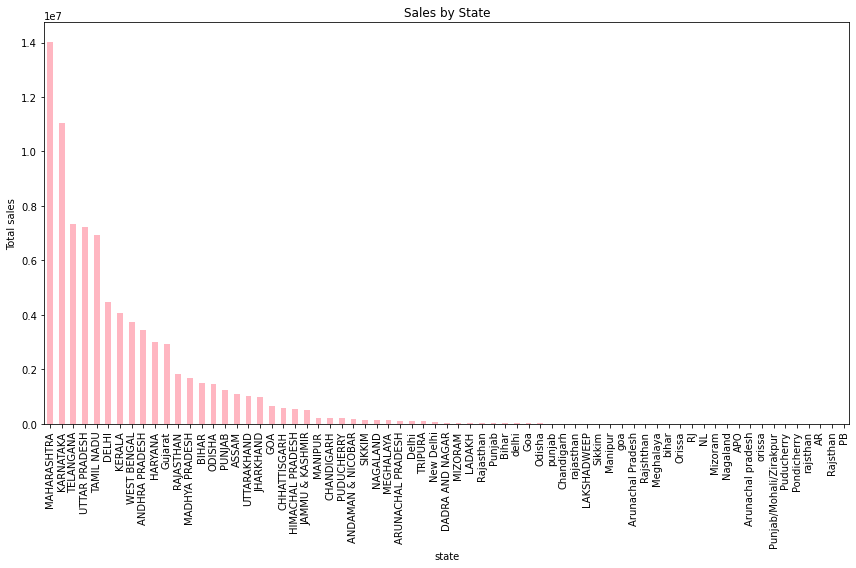

In [44]:
plt.figure(figsize=(12,8))
state_sales.plot(kind='bar',color='lightpink')
plt.title('Sales by State')
plt.xlabel('state')
plt.ylabel('Total sales')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()


In [45]:
top_states =state_sales.head(5)
print("Top 5 states by sales:")
print(top_states)

Top 5 states by sales:
ship-state
MAHARASHTRA      14036496.38
KARNATAKA        11029247.03
TELANGANA         7328935.08
UTTAR PRADESH     7231576.08
TAMIL NADU        6918273.73
Name: Amount, dtype: float64


In [46]:
product_performance = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Top Category:")
print(product_performance.head(5))

Top Category:
Category
T-shirt     41113727.17
Shirt       23180963.70
Blazzer     11689481.12
Trousers     5617185.30
Perfume       829349.66
Name: Amount, dtype: float64


In [47]:
segment_distribution = rfm['Segment'].value_counts()
print("segment distribution:")
print(segment_distribution)

segment distribution:
Low Value       76386
Medium Value    43843
Name: Segment, dtype: int64


In [48]:
fulfillment_analysis = df.groupby('Fulfilment')['Amount'].sum().sort_values(ascending=False)
print("Fulfillment method distribution:")
print(fulfillment_analysis)

Fulfillment method distribution:
Fulfilment
Amazon      57924230.00
Merchant    25284901.39
Name: Amount, dtype: float64


In [49]:
#Sales Trends

In [50]:
sales_trend = df.groupby('Date')['Amount'].sum()


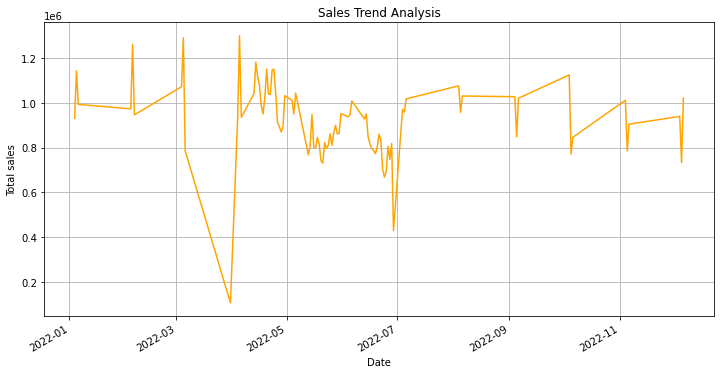

In [51]:
plt.figure(figsize=(12,6))
sales_trend.plot(kind='line',color='orange')
plt.title('Sales Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Total sales')
plt.grid(True)
plt.show()

In [52]:
#product performance by category

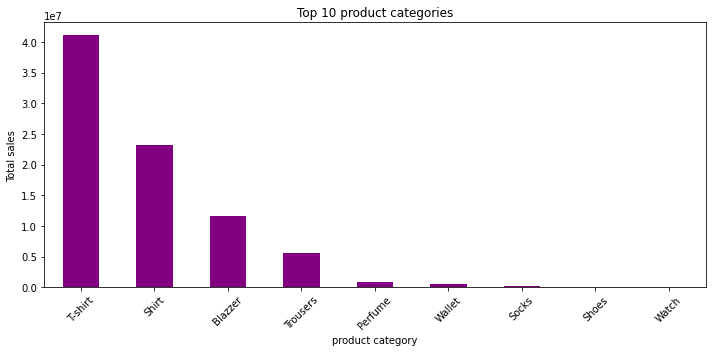

In [53]:
plt.figure(figsize=(10,5))
product_performance.head(10).plot(kind='bar',color='purple')
plt.title('Top 10 product categories')
plt.xlabel('product category')
plt.ylabel('Total sales')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

In [54]:
#customer segments

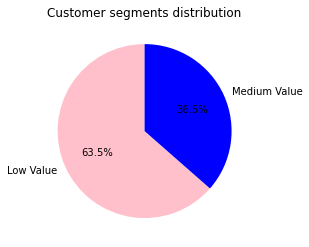

In [55]:
segment_distribution.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=['pink','blue'])
plt.title('Customer segments distribution')
plt.ylabel('')
plt.show()

In [56]:
#Geographical sales

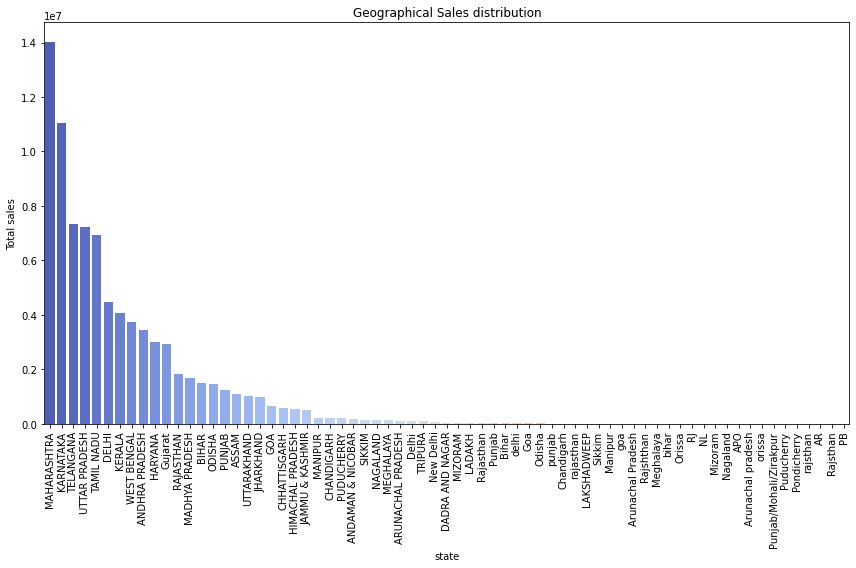

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(x=state_sales.index,y=state_sales.values,palette='coolwarm')
plt.title('Geographical Sales distribution')
plt.xlabel('state')
plt.ylabel('Total sales')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [58]:
df.to_csv('Cleaned Amazon sales report.csv',index=False)